In [4]:
# Short example of classification of events described by a set of particles,
# each described by a 2-element vector

from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed, Dropout
from keras.utils import to_categorical
import numpy as np

import matplotlib.pyplot as plt


length_min = 1
length_max = 10
record_length = 2

epochs = 50
steps_per_epoch = 300

model = Sequential()

model.add(LSTM(32, return_sequences=True, input_shape=(None, record_length)))

model.add(LSTM(32, return_sequences=True))
###model.add(TimeDistributed(Dense(2, activation='sigmoid')))

model.add(Dropout(0.4))
model.add(Dense(20, activation='relu'))
#model.add(Dense(200, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(2, activation='sigmoid'))

print(model.summary(90))

model.compile(loss='categorical_crossentropy',
              optimizer='adam')

def train_generator():
    while True:
        sequence_length = np.random.randint(length_min, length_max)
        x_train = np.random.random((1, sequence_length, record_length))

        y_train = np.zeros( (1, 1, 2))
        # with a probability of 50% the first vector in a set is divided by 10 and the y_train is set to (1,0)
        # in other case y_train = (0, 1)
        if (np.random.randint(2)<0.5):
            for i in range(0,record_length):
               x_train[0,0,i] = x_train[0,0,i]/10.
            y_train[0,0,0] = 1
            y_train[0,0,1] = 0
        else:
            y_train[0,0,0] = 0
            y_train[0,0,1] = 1



#        print sequence_length
#        print x_train.shape
#        print y_train.shape
#        print x_train
#        print y_train
#        print y_trains/nn
            
        yield x_train, y_train  


        


__________________________________________________________________________________________
Layer (type)                            Output Shape                        Param #       
lstm_3 (LSTM)                           (None, None, 32)                    4480          
__________________________________________________________________________________________
lstm_4 (LSTM)                           (None, None, 32)                    8320          
__________________________________________________________________________________________
dropout_2 (Dropout)                     (None, None, 32)                    0             
__________________________________________________________________________________________
dense_2 (Dense)                         (None, None, 20)                    660           
__________________________________________________________________________________________
dense_3 (Dense)                         (None, None, 2)                     42            

In [5]:


history = model.fit_generator(train_generator(), steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=1)



Epoch 1/50
300/300 [==============================] - 5s 16ms/step - loss: 0.6908
Epoch 2/50
300/300 [==============================] - 3s 9ms/step - loss: 0.5722
Epoch 3/50
300/300 [==============================] - 3s 9ms/step - loss: 0.3840
Epoch 4/50
300/300 [==============================] - 3s 10ms/step - loss: 0.3561
Epoch 5/50
300/300 [==============================] - 3s 10ms/step - loss: 0.2261
Epoch 6/50
300/300 [==============================] - 3s 9ms/step - loss: 0.2490
Epoch 7/50
300/300 [==============================] - 3s 9ms/step - loss: 0.2346
Epoch 8/50
300/300 [==============================] - 3s 9ms/step - loss: 0.1357
Epoch 9/50
300/300 [==============================] - 3s 9ms/step - loss: 0.1701
Epoch 10/50
300/300 [==============================] - 3s 9ms/step - loss: 0.1238
Epoch 11/50
300/300 [==============================] - 3s 9ms/step - loss: 0.1635
Epoch 12/50
300/300 [==============================] - 3s 9ms/step - loss: 0.1150
Epoch 13/50
300/300 [=

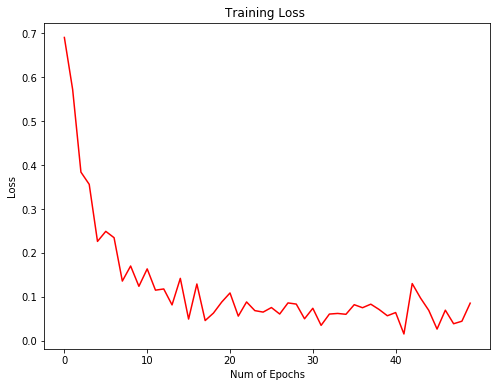

In [6]:


plt.figure(1)
plt.plot(history.history['loss'],'r')

plt.xticks(np.arange(0, epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss ")

plt.show()